[FuncAnimation]:https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html
# [FuncAnimation]

通过间隔地调用函数实现动态绘图的效果

***class matplotlib.animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, \*, cache_frame_data=True, \*\*kwargs)***

If blit == True, func must return an iterable of all artists that were modified or created. This information is used by the blitting algorithm to determine which parts of the figure have to be updated. The return value is unused if blit == False and may be omitted in that case.
在blit为True时(上面的函数签名未写出)：func需要返回，否则不需要

MovieWriter imagemagick unavailable; using Pillow instead.


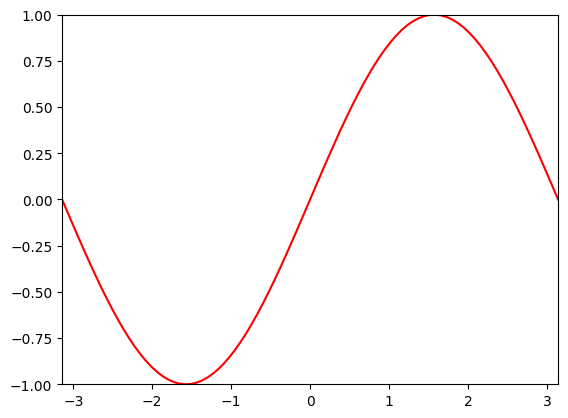

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.animation import FuncAnimation
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = plt.plot([], [], "r-", animated=True)  # artist
x, y = [], []

def init():
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-1, 1)
    return line,

def update(frame):
    x.append(frame)
    y.append(np.sin(frame))
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig
                   ,update
                   ,frames=np.linspace(-np.pi ,np.pi, 90)
                   ,interval=10
                   ,init_func=init
                   ,blit=True
                   )
ani.save("animation.gif", fps=25, writer="imagemagick")

上图在Jupyter中没有动态效果，让我们稍加改进

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#实现动图
%matplotlib qt5

"""
Matplotlib supports specifying a backend for rendering matplotlib graphs through the use a line magic. 
Most of these implementations will shell out to an interactive window when plotting.
# %matplotlib <backend>
""" 
# %matplotlib widget

fig = plt.figure(figsize=(10, 5))  # 创建图
plt.rcParams["font.family"] = "FangSong"  # 支持中文显示
plt.ylim(-12, 12)  # Y轴取值范围
plt.yticks([-12 + 2 * i for i in range(13)], [-12 + 2 * i for i in range(13)])  # Y轴刻度
plt.xlim(0, 2 * np.pi)  # X轴取值范围
plt.xticks([0.5 * i for i in range(14)], [0.5 * i for i in range(14)])  # X轴刻度
plt.title("函数 y = 10 * sin(x) 在[0,2Π]区间的曲线")   # 标题
plt.xlabel("X轴")  # X轴标签
plt.ylabel("Y轴")  # Y轴标签
x, y = [], []  # 用于保存绘图数据，最开始时什么都没有，默认为空


def update(n):  # 更新函数  参数n为frames下一次迭代的返回
    x.append(n)  # 添加X轴坐标
    y.append(10 * np.sin(n))  # 添加Y轴坐标
    plt.plot(x, y, "r--")  # 绘制折线图
# blit 为 False, 不需返回

# 当frames为int时，迭代器为range(frames)，当repeat为True时，会单曲循环，interval为帧间延迟，单位微秒，下面是1000/50 = 20帧
ani = FuncAnimation(fig, update, frames=np.arange(0, 2 * np.pi, 0.1), interval=50, blit=False, repeat=True)  # 创建动画效果
plt.show()  # 显示

# %matplotlib inline
# plt.show()